In [1]:
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("files/003.csv")

In [4]:
!mkdir -p tmp
df.to_csv("tmp/training_data.csv", index=False)

In [5]:
!cat tmp/training_data.csv

target,a,b,c,d,e,f,g,h
151400,2,2,3,7,37,0,3,0
286000,4,4,6,16,64,0,6,0
172200,2,2,4,24,16,2,3,0
141400,4,4,4,0,32,1,4,0
100800,3,3,4,8,8,0,4,0
9600,0,0,0,0,4,0,0,0
28800,0,0,0,8,0,0,0,0
261800,2,2,2,20,60,5,2,0
118800,0,0,0,8,0,0,0,30
222000,0,0,0,20,0,0,0,50
564400,8,20,20,32,80,5,15,0
434400,8,20,20,38,16,10,10,0
456000,30,10,10,40,40,0,0,0
1028000,40,30,30,100,100,0,0,0
120000,0,0,0,0,0,0,0,40
240000,0,0,0,0,0,0,0,80
216800,20,10,5,0,2,0,0,20
274400,20,10,5,4,20,0,0,20
302800,30,10,5,2,4,0,0,30
418000,30,10,5,10,40,0,0,30
303000,0,0,0,50,50,1,0,0
393000,0,0,0,100,100,1,0,0
634000,10,10,10,80,80,0,10,0
374800,0,15,0,80,0,0,8,0
380000,20,30,40,0,0,0,0,0
604000,50,60,30,0,0,0,0,0
224000,10,20,5,20,0,0,0,0
340000,10,30,5,40,0,0,0,0
28000,0,0,1,0,0,8,0,0
302800,4,4,6,14,74,0,6,0
572000,8,8,12,32,128,0,12,0
344400,4,4,8,48,32,4,6,0
282800,8,8,8,0,64,2,8,0
201600,6,6,8,16,16,0,8,0
19200,0,0,0,0,8,0,0,0
57600,0,0,0,16,0,0,0,0
523600,4,4,4,40,120,10,4,0
237600,0,0,0,16,0,0,0,60
444000,0,0,0

In [9]:
import sagemaker

session = sagemaker.Session()
bucket = session.default_bucket()

In [10]:
s3_path = session.upload_data("tmp/training_data.csv")
s3_path

's3://sagemaker-us-east-1-305262579855/data/training_data.csv'

In [11]:
from sagemaker.inputs import TrainingInput
    
train_input = TrainingInput(s3_path, content_type="text/csv")

In [12]:
!pip install 'sagemaker[local]' --upgrade

In [13]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [14]:
import os
import sagemaker
from sagemaker import get_execution_role
from sagemaker.local import LocalSession

sagemaker_session = LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}

role = get_execution_role()

In [15]:
from sagemaker.sklearn.estimator import SKLearn

estimator = SKLearn(entry_point='scripts/sklearn_script.py',
                    session=sagemaker_session,
                    role=role,
                    instance_type='local',
                    instance_count=1,
                    py_version='py3',
                    framework_version='0.20.0')

In [16]:
train_input

In [17]:
estimator.fit({'train': train_input})

Creating jpire2avrs-algo-1-2kyva ... 
Creating jpire2avrs-algo-1-2kyva ... done
Attaching to jpire2avrs-algo-1-2kyva
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:08,978 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:08,982 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:08,993 sagemaker_sklearn_container.training INFO     Invoking user training script.
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:09,177 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:09,192 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:09,209 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
jpire2avrs-algo-1-2kyva | 2021-06-05 07:49:09,221 sagemaker-training-toolkit INFO     In

In [18]:
predictor = estimator.deploy(initial_instance_count=1, instance_type='local')

Attaching to o5mrokb4pn-algo-1-rcaqn
o5mrokb4pn-algo-1-rcaqn | Processing /opt/ml/code
o5mrokb4pn-algo-1-rcaqn | Building wheels for collected packages: sklearn-script
o5mrokb4pn-algo-1-rcaqn |   Building wheel for sklearn-script (setup.py) ... done
o5mrokb4pn-algo-1-rcaqn |   Created wheel for sklearn-script: filename=sklearn_script-1.0.0-py2.py3-none-any.whl size=3997 sha256=586419e5b12dce87afad2ebe1b04825a05fd45e20391033e2bf49b74635c9b11
o5mrokb4pn-algo-1-rcaqn |   Stored in directory: /tmp/pip-ephem-wheel-cache-5udbkgmw/wheels/3e/0f/51/2f1df833dd0412c1bc2f5ee56baac195b5be563353d111dca6
o5mrokb4pn-algo-1-rcaqn | Successfully built sklearn-script
o5mrokb4pn-algo-1-rcaqn | Installing collected packages: sklearn-script
o5mrokb4pn-algo-1-rcaqn | Successfully installed sklearn-script-1.0.0
o5mrokb4pn-algo-1-rcaqn | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importl

## Create dataframe for target and predicted values
---

In [19]:
y_test_vs_pred = pd.DataFrame({'target': df['target'].values})
y_test_vs_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  270 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [20]:
payload = df.drop(['target'], axis=1)

result = predictor.predict(payload)

# Store predictions in dataframe
y_test_vs_pred['predictions'] = result
y_test_vs_pred.info()

o5mrokb4pn-algo-1-rcaqn | 2021-06-05 07:50:43,249 INFO - sagemaker-containers - No GPUs detected (normal if no gpus installed)
o5mrokb4pn-algo-1-rcaqn | /miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
o5mrokb4pn-algo-1-rcaqn |   import imp
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       270 non-null    int64  
 1   predictions  270 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
o5mrokb4pn-algo-1-rcaqn | 172.18.0.1 - - [05/Jun/2021:07:50:43 +0000] "POST /invocations HTTP/1.1" 200 2288 "-" "python-urllib3/1.26.5"


In [22]:
y_test_vs_pred.head()

,target,predictions
0,151400,151438.52
1,286000,283424.15
2,172200,168843.35
3,141400,148149.95
4,100800,110505.18


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '\nSKLearn model\nActual vs. Predicted values\n')

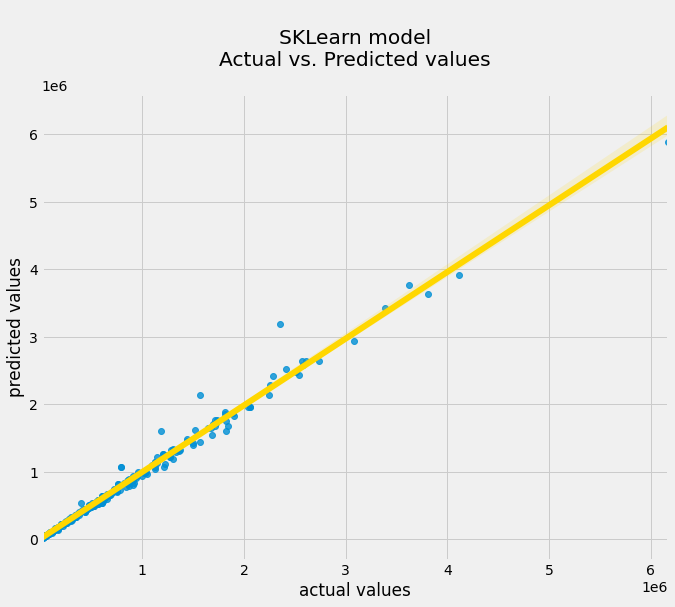

In [25]:
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.regplot(y_test_vs_pred['target'], y_test_vs_pred['predictions'], line_kws={'color': 'gold'})

plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("\nSKLearn model\nActual vs. Predicted values\n")

In [23]:
predictor.delete_endpoint()
print(f"deleted {predictor.endpoint_name} successfully!")

Gracefully stopping... (press Ctrl+C again to force)
deleted sagemaker-scikit-learn-2021-06-05-07-49-33-351 successfully!
